In [109]:
#for data analysis
import pandas as pd

In [110]:
#for data visualization
import seaborn as sb

In [149]:
#for algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [112]:
#reading data
file_path_v1 = r"C:\Users\rafae\Downloads\houses_to_rent.csv"
file_path_v2 = r"C:\Users\rafae\Downloads\houses_to_rent_v2.csv"

house_rent = pd.read_csv(file_path_v1)
house_rentv2 = pd.read_csv(file_path_v2)

house_rent.head()
house_rentv2.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [113]:
house_rentv2.describe(include="O")

,city,floor,animal,furniture
count,10692,10692,10692,10692
unique,5,35,2,2
top,São Paulo,-,acept,not furnished
freq,5887,2461,8316,8086


In [114]:
house_rentv2.isna().sum().sort_values(ascending=True)

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [115]:
house_rentv2['animal'] = pd.get_dummies(house_rentv2['animal'], drop_first=True)
house_rentv2['furniture'] = pd.get_dummies(house_rentv2['furniture'], drop_first=True)
house_rentv2.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,0,1,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,1,1,0,800,25,11,836


<AxesSubplot:xlabel='animal', ylabel='count'>

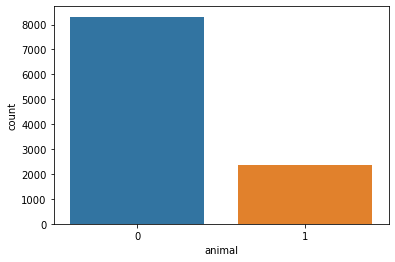

In [116]:
sb.countplot(x = 'animal', data=house_rentv2)

In [117]:
house_rentv2[['animal','furniture']].groupby('animal', as_index=False).mean().sort_values(by='animal', ascending=True)

,animal,furniture
0,0,0.776455
1,1,0.685606


In [118]:
house_rent = house_rentv2 #save for later

In [119]:
house_rent['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

0,São Paulo
1,Porto Alegre
2,Rio de Janeiro
3,Campinas
4,Belo Horizonte

In [120]:
house_rent['city'] = pd.get_dummies(house_rent['city'], drop_first=True)
house_rent.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,0,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,0,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,0,51,2,1,0,2,0,1,270,1112,22,17,1421
4,0,25,1,1,0,1,1,1,0,800,25,11,836


In [121]:
house_rent = house_rent.drop(columns=['floor'])

In [122]:
house_rent.corr()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
city,1.000000,-0.006391,-0.037927,-0.057893,-0.009469,-0.024540,0.077911,-0.010294,-0.132342,-0.020754,-0.128912,-0.041391
area,-0.006391,1.000000,0.193796,0.226766,0.193983,-0.039626,-0.008175,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,-0.037927,0.193796,1.000000,0.733763,0.617510,-0.172190,0.080694,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,-0.057893,0.226766,0.733763,1.000000,0.697379,-0.118255,-0.017938,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,-0.009469,0.193983,0.617510,0.697379,1.000000,-0.127432,0.004720,0.009321,0.578361,0.098378,0.597348,0.148684
animal,-0.024540,-0.039626,-0.172190,-0.118255,-0.127432,1.000000,-0.087972,0.022008,-0.067754,0.003006,-0.079152,0.007143
furniture,0.077911,-0.008175,0.080694,-0.017938,0.004720,-0.087972,1.000000,-0.003413,-0.164235,-0.000985,-0.141768,-0.037781
hoa (R$),-0.010294,0.006890,0.007139,0.050271,0.009321,0.022008,-0.003413,1.000000,0.036490,0.007627,0.029535,0.955024
rent amount (R$),-0.132342,0.180742,0.541758,0.668504,0.578361,-0.067754,-0.164235,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),-0.020754,0.039059,0.075252,0.109253,0.098378,0.003006,-0.000985,0.007627,0.107884,1.000000,0.105661,0.218344


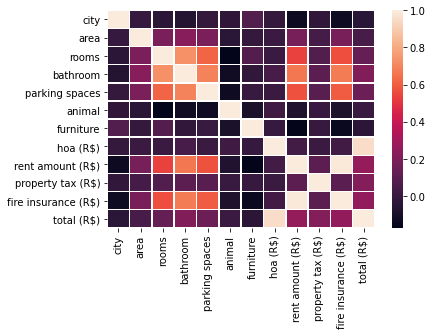

In [123]:
ax = sb.heatmap(house_rent.corr(), linewidths=.5)

In [146]:
print(house_rent.columns.values)
house_rent.head()

['animal' 'area' 'rooms' 'bathroom' 'parking spaces' 'city' 'furniture'
 'hoa (R$)' 'rent amount (R$)' 'property tax (R$)' 'fire insurance (R$)'
 'total (R$)']


,animal,area,rooms,bathroom,parking spaces,city,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0,70,2,1,1,0,0,2065,3300,211,42,5618
1,0,320,4,4,0,0,1,1200,4960,1750,63,7973
2,0,80,1,1,1,0,1,1000,2800,0,41,3841
3,0,51,2,1,0,0,1,270,1112,22,17,1421
4,1,25,1,1,0,0,1,0,800,25,11,836


In [126]:
house_rent = house_rent[['animal', 'area', 'rooms', 'bathroom', 'parking spaces', 'city', 'furniture', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']]

Creating Model

In [147]:
X_train = house_rent.drop("animal", axis=1)
Y_train = house_rent["animal"]
X_test  = house_rent.drop("furniture", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((10692, 11), (10692,), (10692, 11))

In [150]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


77.55

In [151]:
coeff_df = pd.DataFrame(house_rent.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,rent amount (R$),0.019277
8,property tax (R$),0.018600
6,hoa (R$),0.018584
0,area,-0.002516
4,city,-0.011745
10,total (R$),-0.018582
9,fire insurance (R$),-0.036077
3,parking spaces,-0.039271
2,bathroom,-0.064390
5,furniture,-0.073937


Creating model

In [152]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

77.81

Testing Model

In [153]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.1

In [154]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.54

In [155]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

77.78

In [156]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


75.88

In [157]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

69.84

In [158]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.88

In [159]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.87

In [160]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,99.88
3,Random Forest,99.87
1,KNN,85.10
0,Support Vector Machines,77.81
5,Perceptron,77.78
2,Logistic Regression,77.55
4,Naive Bayes,77.54
7,Linear SVC,75.88
6,Stochastic Gradient Decent,69.84


In [163]:
submission = pd.DataFrame({
    "city": house_rent["animal"],
    "animal": Y_pred
})